
**Analitik dan Visualisasi Data**

Nama : Satria Rajwali Ektya Antara

NIM : 2409116067

Kelas : B 24

Dataset : Pima Indians Diabetes Database

Studi Kasus:

*   Memprediksi risiko diabetes pada pasien berdasarkan fitur-fitur kesehatan.

*   Memberikan wawasan tentang faktor-faktor yang paling berpengaruh terhadap diabetes.

---



#**Business Understanding**

## **Business Objective**

Tujuan dilakukannya proyek ini adalah untuk menganalisis faktor-faktor yang berkontribusi terhadap diabetes dan memprediksi kemungkinan seseorang menderita diabetes berdasarkan fitur-fitur kesehatan seperti kadar glukosa, indeks massa tubuh (BMI), usia, dan riwayat keluarga. Proyek ini bertujuan untuk membantu tenaga medis dalam mengidentifikasi pasien yang berisiko tinggi terkena diabetes, sehingga dapat memberikan intervensi dini dan perawatan yang lebih efektif. Selain itu, hasil analisis ini dapat digunakan oleh institusi kesehatan untuk merancang program pencegahan diabetes yang lebih terarah.

## **Business Objective**

Situasi bisnis yang mendasari analisis ini adalah meningkatnya prevalensi diabetes di seluruh dunia, terutama diabetes tipe 2, yang dapat dicegah dengan deteksi dini dan perubahan gaya hidup. Dengan memanfaatkan data kesehatan pasien, proyek ini bertujuan untuk memberikan wawasan yang dapat membantu mengurangi beban kesehatan dan biaya perawatan yang terkait dengan diabetes. Analisis ini juga dapat membantu perusahaan asuransi kesehatan dalam menilai risiko dan merancang produk asuransi yang lebih sesuai.

## **Goals**

menganalisis faktor-faktor kesehatan seperti kadar glukosa, BMI, dan usia yang berkontribusi terhadap risiko diabetes. Selain itu, proyek ini bertujuan untuk membangun sebuah sistem prediksi yang dapat mengidentifikasi pasien yang berisiko tinggi terkena diabetes. Hasil analisis ini diharapkan dapat memberikan wawasan yang berguna bagi tenaga medis dalam merancang strategi pencegahan dan penanganan diabetes yang lebih efektif.

## **Project Plan**

Proyek ini akan dimulai dengan mengumpulkan dan memahami dataset Pima Indians Diabetes Database. Data akan dibersihkan untuk memastikan kualitasnya, seperti menangani data yang hilang dan menyesuaikan skala data agar lebih mudah dianalisis. Selanjutnya, analisis eksplorasi akan dilakukan untuk memahami hubungan antara faktor-faktor kesehatan (seperti kadar glukosa, BMI, dan usia) dengan risiko diabetes. Visualisasi data akan digunakan untuk menjelaskan pola dan tren yang ditemukan. Hasil akhir dari proyek ini akan disajikan dalam bentuk laporan dan visualisasi yang mudah dipahami, serta rekomendasi untuk tenaga medis dalam upaya pencegahan diabetes.


# **Data Understanding**


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/diabetes.csv')


In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Semua tipe data berupa numerik (int dan float)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Statistik deskriptif seperti mean, std, min, max, dan kuartil untuk setiap kolom.



## Korelasi

In [10]:
# Hitung korelasi Pearson
correlation = df.corr()

# Tampilkan korelasi dengan Outcome
print(correlation['Outcome'].sort_values(ascending=False))

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

###Kesimpulan Umum
Glucose adalah fitur paling penting dalam memprediksi diabetes, diikuti oleh BMI dan Age.

Fitur seperti SkinThickness dan BloodPressure memiliki pengaruh yang sangat kecil dan bisa dihapus untuk menyederhanakan model.


## About Dataset
Dataset ini terdiri dari 768 baris dan 9 kolom, yaitu:
link:https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database



1.   Pregnancies – Menunjukkan jumlah kehamilan yang pernah dialami oleh pasien.

2.   Glucose – Konsentrasi glukosa dalam darah setelah tes toleransi glukosa.

3. Blood Pressure – Tekanan darah diastolik (mm Hg).

4. Skin Thickness – Ketebalan lipatan kulit triceps dalam satuan mm.

5. Insulin – Kadar insulin serum dalam darah setelah 2 jam (mu U/ml).

6. BMI – Indeks Massa Tubuh (BMI) yang dihitung berdasarkan berat dan tinggi badan.

7. Diabetes Pedigree Function – Skor berdasarkan riwayat diabetes dalam keluarga.

8. Age – Usia pasien dalam tahun.

9. Outcome – Variabel target yang menunjukkan apakah pasien menderita diabetes (1) atau tidak (0).



## Informasi Tambahan


* Dataset ini berasal dari National Institute of Diabetes and Digestive and Kidney Diseases.

* Semua individu dalam dataset ini adalah perempuan suku Pima yang berusia 21 tahun ke atas.

* Dataset ini sering digunakan dalam penelitian dan eksperimen pembelajaran mesin, khususnya dalam klasifikasi biner untuk mendeteksi diabetes.

#Data Preparation

In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Pengecekan Data

##Missing Value

In [12]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


tidak ada missing *value* tapi ada berapa value penting seperti glucose,tekanan darah , ketebalan kulit, insulin BMI itu tidak mungkin nilai nya 0 dalam tubuh seseorang secara biologis oleh  karena itu akan saya gantikan dengan median saja

## mengatasi value "0" pada kolom penting

In [13]:
# Mengisi nilai 0 dengan NaN untuk kolom yang seharusnya tidak memiliki 0
cols_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_to_replace] = df[cols_to_replace].replace(0, pd.NA)

# Mengisi nilai yang hilang dengan median
df.fillna(df.median(), inplace=True)

<ipython-input-13-45ba8660686e>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.median(), inplace=True)


In [14]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


## Duplicated Values

In [15]:
df.duplicated().sum()

0

Tidak ada duplikat

## inconsisten value

Tidak ada incosistent value

## Outliers

In [16]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    percent_outliers = (len(outliers) / len(df)) * 100

    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Pregnancies,0.520833
Glucose,0.000000
BloodPressure,1.822917
SkinThickness,11.328125
Insulin,45.052083
BMI,1.041667
DiabetesPedigreeFunction,3.776042
Age,1.171875
Outcome,0.000000


Terpantau ketebalan kulit dan insulin melebihi 10% jadi bakal kita imputasi

## penanganan

In [17]:
columns_to_impute = ["SkinThickness", "Insulin"]

for col in columns_to_impute:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df.loc[:, col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [18]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    percent_outliers = (len(outliers) / len(df)) * 100

    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Pregnancies,0.520833
Glucose,0.000000
BloodPressure,1.822917
SkinThickness,0.000000
Insulin,0.000000
BMI,1.041667
DiabetesPedigreeFunction,3.776042
Age,1.171875
Outcome,0.000000


In [19]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.000,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.000,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.000,23.3,0.672,32,1
3,1,89.0,66.0,23.0,112.875,28.1,0.167,21,0
4,0,137.0,40.0,35.0,135.875,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,42.5,135.875,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.000,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.875,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.000,30.1,0.349,47,1


##Data Construction

In [20]:
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category
0,6,148.0,72.0,35.0,125.000,33.6,0.627,50,1,Obese
1,1,85.0,66.0,29.0,125.000,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,29.0,125.000,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,112.875,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,135.875,43.1,2.288,33,1,Obese
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,42.5,135.875,32.9,0.171,63,0,Obese
764,2,122.0,70.0,27.0,125.000,36.8,0.340,27,0,Obese
765,5,121.0,72.0,23.0,112.875,26.2,0.245,30,0,Overweight
766,1,126.0,60.0,29.0,125.000,30.1,0.349,47,1,Obese


menambahkan kolom baru BMI_Category yang berisi kategori berdasarkan BMI

## Data Reduction

Dataset diatas semua kolom masih relevan menurut saya saat ini. dengan hasil akhir pada table berikut:


In [21]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category
0,6,148.0,72.0,35.0,125.000,33.6,0.627,50,1,Obese
1,1,85.0,66.0,29.0,125.000,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,29.0,125.000,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,112.875,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,135.875,43.1,2.288,33,1,Obese
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,42.5,135.875,32.9,0.171,63,0,Obese
764,2,122.0,70.0,27.0,125.000,36.8,0.340,27,0,Obese
765,5,121.0,72.0,23.0,112.875,26.2,0.245,30,0,Overweight
766,1,126.0,60.0,29.0,125.000,30.1,0.349,47,1,Obese


# Visualisasi Data

## **Insight**
Dataset memiliki ketidakseimbangan kelas:

Non-Diabetes (Outcome = 0): 65.0%

Diabetes (Outcome = 1): 35.0%

Jumlah pasien non-diabetes lebih banyak daripada pasien diabetes.

## **Tindakan yang Dapat Diambil**
Program Pencegahan:
* Fokus pada pasien dengan risiko tinggi (misalnya, kadar glukosa tinggi, BMI tinggi) untuk program pencegahan diabetes.

Edukasi Kesehatan:
* Tingkatkan kesadaran masyarakat tentang pentingnya menjaga  kadar glukosa dan berat badan yang sehat.

Screening Rutin:
* Lakukan screening kesehatan rutin untuk mendeteksi diabetes sejak dini, terutama pada kelompok berisiko tinggi.

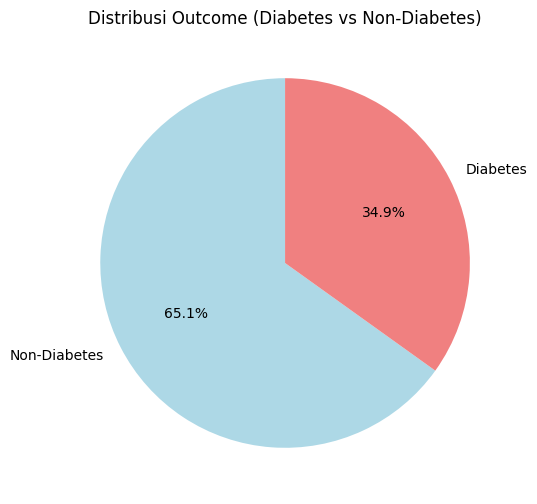

In [28]:
outcome_counts = df['Outcome'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=['Non-Diabetes', 'Diabetes'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Distribusi Outcome (Diabetes vs Non-Diabetes)')
plt.show()


## **Insight**

Distribusi BMI cenderung right-skewed (miring ke kanan), artinya sebagian besar pasien memiliki BMI dalam rentang normal hingga overweight.

Beberapa pasien memiliki BMI sangat tinggi (obesitas).

Hubungan dengan Diabetes:

* Pasien dengan BMI tinggi (obesitas) memiliki risiko diabetes yang lebih besar.

## **Tindakan yang Dapat Diambil**
 Program Penurunan Berat Badan:
* Fokus pada pasien dengan BMI tinggi untuk program penurunan berat badan dan gaya hidup sehat.

Kampanye Kesehatan:
* Lakukan kampanye kesehatan tentang bahaya obesitas dan pentingnya menjaga berat badan ideal.

Konsultasi Gizi:
* Berikan konsultasi gizi untuk pasien dengan BMI tinggi.

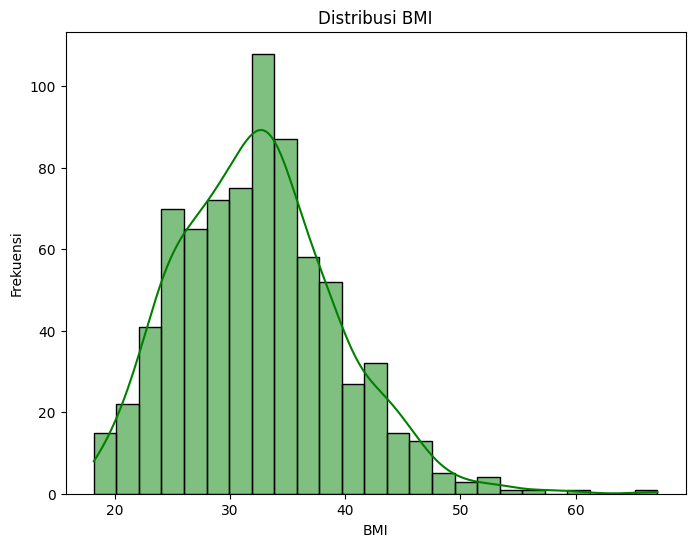

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], kde=True, color='green')
plt.title('Distribusi BMI')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.show()

## **Insight**


Fitur dengan Korelasi Tinggi terhadap Outcome:

* Glucose (0.47)

* BMI (0.29)

* Age (0.24)

Fitur dengan Korelasi Rendah terhadap Outcome:

* SkinThickness (0.07)

* BloodPressure (0.07)

Korelasi Antar Fitur:

* Age dan Pregnancies memiliki korelasi yang cukup tinggi (0.54), yang wajar karena semakin tua usia, semakin banyak kehamilan yang mungkin dialami.

## **Tindakan yang Dapat Diambil**
Fokus pada Faktor Risiko Utama:
* Prioritaskan faktor risiko utama seperti kadar glukosa, BMI, dan usia dalam program pencegahan diabetes.

Program Kesehatan Terarah:
* Buat program kesehatan yang menargetkan kelompok usia lanjut dan pasien dengan BMI tinggi.

Edukasi tentang Gaya Hidup Sehat:
* Tingkatkan kesadaran tentang pentingnya menjaga kadar glukosa, berat badan, dan tekanan darah.

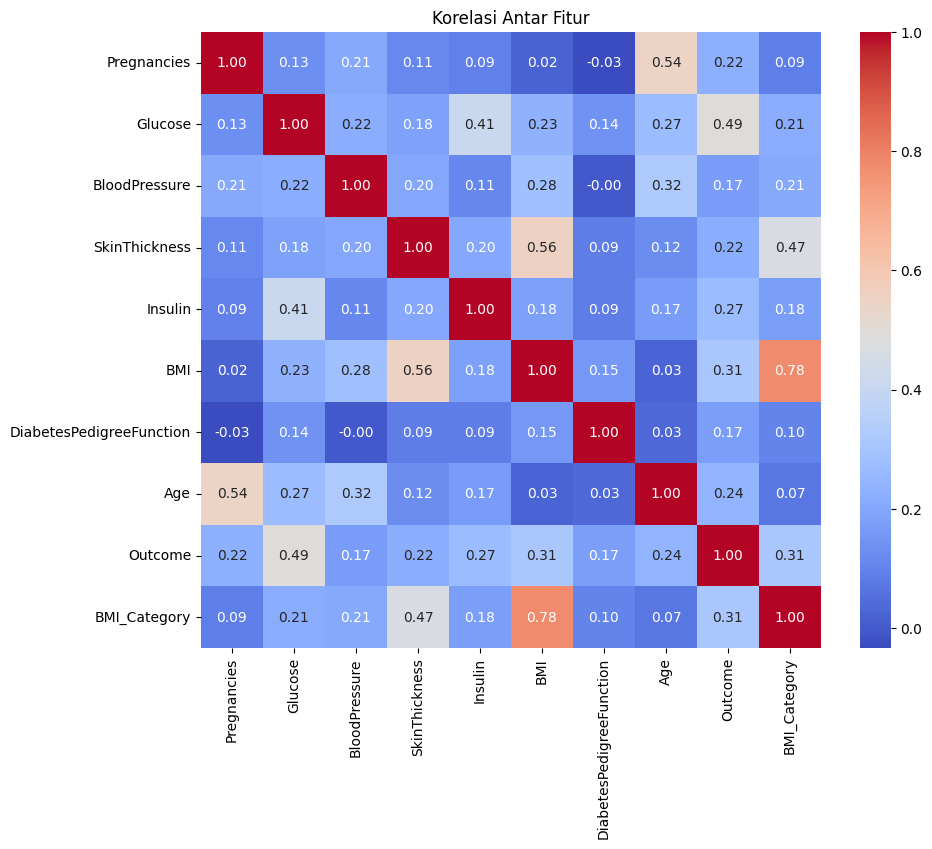

In [31]:
df['BMI_Category'] = df['BMI_Category'].astype('category').cat.codes

correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur')
plt.show()

## **Insight**



 Pasien Diabetes (Outcome = 1):

* Cenderung memiliki kadar glukosa tinggi dan BMI tinggi.

* Pasien Non-Diabetes (Outcome = 0):

* Sebagian besar memiliki kadar glukosa dan BMI dalam rentang normal.

Pola:

* Terlihat pola bahwa pasien dengan kadar glukosa tinggi dan BMI tinggi lebih mungkin terkena diabetes.


## **Tindakan yang Dapat Diambil**
Intervensi Kesehatan:

* Pasien dengan kadar glukosa tinggi dan BMI tinggi harus diprioritaskan untuk program pencegahan diabetes.

Program Olahraga dan Diet:

* Rancang program olahraga dan diet khusus untuk pasien dengan kadar glukosa dan BMI tinggi.

Monitoring Kesehatan:

* Lakukan monitoring kesehatan rutin untuk pasien dengan risiko tinggi.

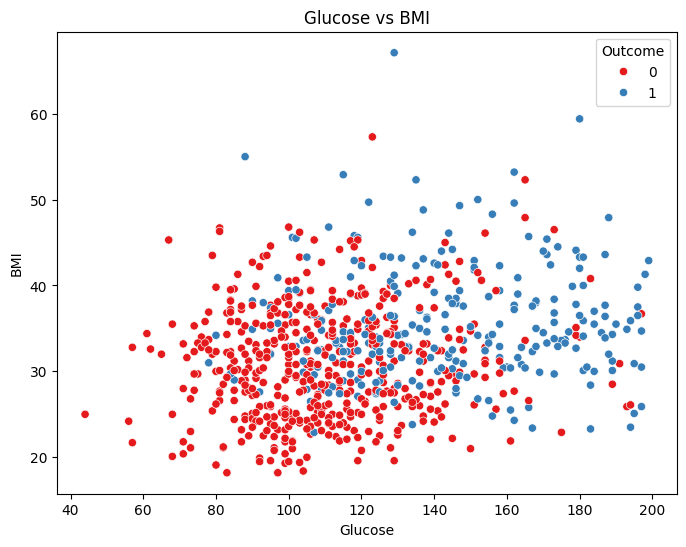

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='Set1')
plt.title('Glucose vs BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()